**SML Assignment-4**

In [0]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import statistics

**LOADING DATA**

In [0]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
targetboston= pd.DataFrame(boston_dataset.target)
print("Features Matrix is:")
print(boston)
print("Label vector is MEDV:")
print(targetboston)

Features Matrix is:
        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 colu

In [0]:
def normalequation(x1,y1):
  #return np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
  return np.matmul(np.linalg.inv(np.matmul(x1.T,x1)), np.matmul(x1.T,y1))

Generate THETA by taking X= ALL FEATURES and Y= TARGET VARIABLE("MEDV")

In [0]:
feat=np.ones((506,14))
feat[:,1:14]=np.asarray(boston.iloc[:,0:13])
label=np.asarray(targetboston)
theta=normalequation(feat,label)
thetadf=pd.DataFrame(theta)
print(thetadf)
print(pd.DataFrame(feat))
feattrain=feat[0:403,:]
labeltrain=label[0:404,:]
feattest=feat[404:505,:]
labeltest=label[404:505,:]


            0
0   36.459488
1   -0.108011
2    0.046420
3    0.020559
4    2.686734
5  -17.766611
6    3.809865
7    0.000692
8   -1.475567
9    0.306049
10  -0.012335
11  -0.952747
12   0.009312
13  -0.524758
      0        1     2      3    4   ...   9      10    11      12    13
0    1.0  0.00632  18.0   2.31  0.0  ...  1.0  296.0  15.3  396.90  4.98
1    1.0  0.02731   0.0   7.07  0.0  ...  2.0  242.0  17.8  396.90  9.14
2    1.0  0.02729   0.0   7.07  0.0  ...  2.0  242.0  17.8  392.83  4.03
3    1.0  0.03237   0.0   2.18  0.0  ...  3.0  222.0  18.7  394.63  2.94
4    1.0  0.06905   0.0   2.18  0.0  ...  3.0  222.0  18.7  396.90  5.33
..   ...      ...   ...    ...  ...  ...  ...    ...   ...     ...   ...
501  1.0  0.06263   0.0  11.93  0.0  ...  1.0  273.0  21.0  391.99  9.67
502  1.0  0.04527   0.0  11.93  0.0  ...  1.0  273.0  21.0  396.90  9.08
503  1.0  0.06076   0.0  11.93  0.0  ...  1.0  273.0  21.0  396.90  5.64
504  1.0  0.10959   0.0  11.93  0.0  ...  1.0  273.0  21.0  

**Splitting the data into train and test using 80:20 split ratio**

In [0]:
boston1=boston.copy()
boston1['MEDV']=targetboston
training=boston1.iloc[0:404,:]
test=boston1.iloc[404:506,:]

In [0]:
theta=np.asarray(theta)

**Linear Regression**

In [0]:
def linreg(dataset,theta,label):
  rmsemat=[]
  for i in range(0,len(dataset)):
    htheta=np.dot(theta.T,dataset[i])
    rmsemat.append(htheta)
  trainarr=np.asarray(dataset)
  rmsemat=np.asarray(rmsemat)
  outdf=pd.DataFrame(label)
  ermat=pd.DataFrame(rmsemat)
  error=outdf.subtract(ermat)
  ersq=error**2
  h1=math.sqrt((ersq.iloc[:,0].sum())/error.shape[0])
  print("Linear Regression RMSE is:")
  print(h1)
#------------------------------------------------------
linreg(feattest,theta,labeltest)  

Linear Regression RMSE is:
3.729073469663866


**Reducing Dataset to consider only LSTAT vs MEDV as instructed in the question**

In [0]:
tr2=training.iloc[:,12:14]
tr3=test.iloc[:,12:14]
print("Simplified Dataset LSTAT vs MEDV")
print("New Training Dataset:")
print(tr2)
print("New Test Dataset:")
print(tr3)

Simplified Dataset LSTAT vs MEDV
New Training Dataset:
     LSTAT  MEDV
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
399  29.97   6.3
400  26.77   5.6
401  20.32   7.2
402  20.31  12.1
403  19.77   8.3

[404 rows x 2 columns]
New Test Dataset:
     LSTAT  MEDV
404  27.38   8.5
405  22.98   5.0
406  23.34  11.9
407  12.13  27.9
408  26.40  17.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[102 rows x 2 columns]


**K-Fold Set Generator**

In [0]:
def splitintokframes(dataset, k): 
    listofsubframes = list()
    framesize=math.ceil(len(dataset)/k)
    for i in range(k):
        listofsubframes.append(dataset[i*framesize:(i+1)*framesize])
    return listofsubframes

def kfoldgen(dataset,k):
  folds = splitintokframes(dataset, k)
  trainset=list()
  valset=list()
  for i in range(k):
      train = folds.copy()
      test = folds[i]
      del train[i]
      train = pd.concat(train, sort=False)
      trainset.append(train)
      valset.append(test)
  return trainset,valset    
#------------------------------------------------------------------------- 
trainset,valset=kfoldgen(tr2,5)   
for i in range(5):
    print("Test set is:")
    print(pd.DataFrame(valset[i]))
    print("Train set is:")
    print(pd.DataFrame(trainset[i]))

Test set is:
    LSTAT  MEDV
0    4.98  24.0
1    9.14  21.6
2    4.03  34.7
3    2.94  33.4
4    5.33  36.2
..    ...   ...
76  11.97  20.0
77  10.27  20.8
78  12.34  21.2
79   9.10  20.3
80   5.29  28.0

[81 rows x 2 columns]
Train set is:
     LSTAT  MEDV
81    7.22  23.9
82    6.72  24.8
83    7.51  22.9
84    9.62  23.9
85    6.53  26.6
..     ...   ...
399  29.97   6.3
400  26.77   5.6
401  20.32   7.2
402  20.31  12.1
403  19.77   8.3

[323 rows x 2 columns]
Test set is:
     LSTAT  MEDV
81    7.22  23.9
82    6.72  24.8
83    7.51  22.9
84    9.62  23.9
85    6.53  26.6
..     ...   ...
157   4.59  41.3
158   6.43  24.3
159   7.39  23.3
160   5.50  27.0
161   1.73  50.0

[81 rows x 2 columns]
Train set is:
     LSTAT  MEDV
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
399  29.97   6.3
400  26.77   5.6
401  20.32   7.2
402  20.31  12.1
403  19.77   8.3

[323 rows x 2 columns]
Test set is:
     LSTAT  MEDV
162   1.92  50.0
1

Text(0, 0.5, 'MEDV')

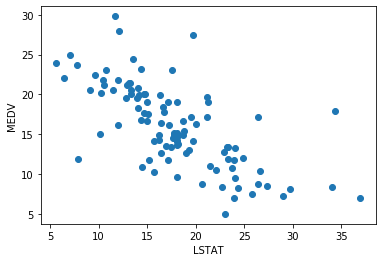

In [0]:
plt.scatter(tr3.iloc[:,0],tr3.iloc[:,1])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")


**Polynomial Regression Function**

In [0]:
def polyreg(dataset,degree):
  x=np.asarray(dataset.iloc[:,0])
  y=np.asarray(dataset.iloc[:,1])
  y1=np.zeros((len(x),1))
  y1=pd.DataFrame(y1)
  y1.iloc[:,0]=y
  y1=np.asarray(y1)
  x1=np.ones((len(x),degree+1))
  for i in range(degree+1):
    x1[:,i]=x**i
  theta = np.dot(np.linalg.pinv(np.dot(x1.T,x1)+0.0*np.identity(x1.shape[1])), np.dot(x1.T,y1))  
  #theta=normalequation(x1,y1)
  hypo=theta[0]
  for j in range(1,degree+1):
    hypo=hypo+theta[j]*x1[:,j]
  #hypo=np.dot(x1,theta)  
  y1=y1.reshape(1,len(x))
  errormat=hypo-y1
  gh=np.array(errormat[0])
  gh=gh**2
  tota=np.sum(gh)
  tota=math.sqrt(tota/len(x)) 
  return tota,hypo,theta

def polyreg1(dataset,degree,theta):
  x=np.asarray(dataset.iloc[:,0])
  y=np.asarray(dataset.iloc[:,1])
  y1=np.zeros((len(x),1))
  y1=pd.DataFrame(y1)
  y1.iloc[:,0]=y
  y1=np.asarray(y1)
  x1=np.ones((len(x),degree+1))
  for i in range(degree+1):
    x1[:,i]=x**i
  #theta = np.dot(np.linalg.pinv(np.dot(x1.T,x1)+1*np.identity(x1.shape[1])), np.dot(x1.T,y1))  
  #theta=normalequation(x1,y1)
  hypo=theta[0]
  for j in range(1,degree+1):
    hypo=hypo+theta[j]*x1[:,j]
  #hypo=np.dot(x1,theta)  
  y1=y1.reshape(1,len(x))
  errormat=hypo-y1
  gh=np.array(errormat[0])
  gh=gh**2
  tota=np.sum(gh)
  tota=math.sqrt(tota/len(x)) 
  return tota,hypo


**RMSE Generator Function**

    degree  Mean Training Set RMSE  Mean Validation Set RMSE
0        1                6.478863                  6.725693
1        2                5.735693                  6.064319
2        3                5.570609                  5.780283
3        4                5.450065                  5.670268
4        5                6.728691                  7.896612
5        6               16.116540                 21.316760
6        7               20.497910                 28.740224
7        8               22.323800                 35.343915
8        9               23.443496                 42.914042
9       10               24.136873                 53.091763
10      11               24.583342                 67.617101
11      12               25.486981                 43.003170
12      13               25.556020                 47.289989
13      14               25.601315                 52.532208
14      15               25.632368                 59.302253
15      16              

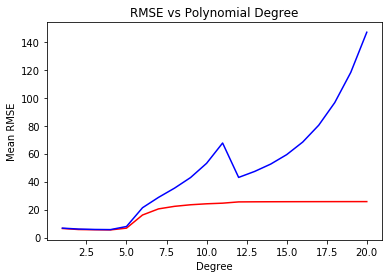

In [0]:
def plotandrmsegen(trainset,valset,n): #takes list of dataframes #n:upto which degree
  import statistics
  averagermse=np.zeros((n,2))
  for j in range(n):
    trainrms=list()
    valrms1=list()
    for i in range(5):
      curtrainset=trainset[i]
      er,hypo,thet=polyreg(curtrainset,j+1)
      trainrms.append(er)
      curvalset=valset[i]
      er1,hypo1=polyreg1(curvalset,j+1,thet)
      valrms1.append(er1)
    avg=statistics.mean(trainrms)
    avg1=statistics.mean(valrms1)  
    averagermse[j,0]=avg
    averagermse[j,1]=avg1
  rmseframe=pd.DataFrame(averagermse)
  deg=np.arange(1,n+1)
  rmseframe.insert(0, 'degree', deg)
  rmseframe.columns = ['degree', 'Mean Training Set RMSE','Mean Validation Set RMSE']
  print(rmseframe)
  plt.plot(deg,rmseframe.iloc[:,1],'r')
  plt.plot(deg,rmseframe.iloc[:,2],'b')
  plt.xlabel('Degree')
  plt.ylabel('Mean RMSE')
  plt.title("RMSE vs Polynomial Degree")

#---------------------------------------------------------------------------------  
plotandrmsegen(trainset,valset,20)



**RMSE Calculator for Training and Test set for optimal Degree polynomial Regression**

In [0]:
#Degree with least RMSE=4
mindeg=4
trainingrmse,hhs,l=polyreg(tr2,mindeg)
testrmse,hjh=polyreg1(tr3,mindeg,l)
print("RMSE of Training set is:")
print(trainingrmse)
print("RMSE of Test set is:")
print(testrmse)

RMSE of Training set is:
5.494182805266665
RMSE of Test set is:
4.323676090106278


**RMSE for Second Dataset**

    degree  Mean Training Set RMSE  Mean Validation Set RMSE
0        1                0.817672                  0.817087
1        2                0.816699                  0.819009
2        3                0.792884                  0.803258
3        4                0.790138                  0.804955
4        5                0.569111                  0.596107
5        6                0.567656                  0.604599
6        7                0.396859                  0.420107
7        8                0.395480                  0.421201
8        9                0.388460                  0.418638
9       10                0.387610                  0.425961
10      11                0.463349                  0.492732
11      12                0.616052                  0.651457
12      13                0.598187                  0.612923
13      14                0.598712                  0.612944
14      15                0.606437                  0.624364


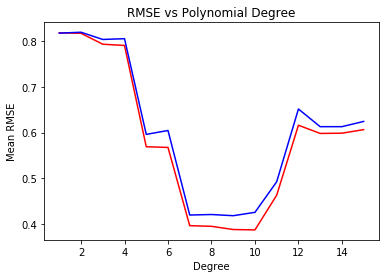

In [0]:
df = pd.read_csv('/content/drive/My Drive/data.csv')
traindata,valdata=kfoldgen(df,5)
plotandrmsegen(traindata,valdata,15)

**Print all the k-fold sets**

In [0]:
for i in range(5):
    print("Test set is:")
    print(pd.DataFrame(valdata[i]))
    print("Train set is:")
    print(pd.DataFrame(traindata[i]))

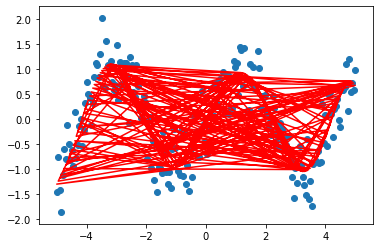

In [0]:
def regressionlinegen(trainset,degree,testset):
  error,hypo,theta=polyreg(trainset,degree)
  error1,hypo1=polyreg1(testset,degree,theta)
  plt.plot(testset.iloc[:,0],hypo1,'r')
  plt.scatter(testset.iloc[:,0],testset.iloc[:,1])
#regressionlinegen(tr2,30,tr3)

def regressionlinegen1(dset,degree):
  error,hypo,theta=polyreg(dset,degree)
  plt.plot(dset.iloc[:,0],hypo,'r')
  plt.scatter(dset.iloc[:,0],dset.iloc[:,1])
regressionlinegen1(df,10)